Data Collection & Analysis

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
#Import dataset
data = pd.read_csv('heart.csv')

In [249]:
#Taking care of missing value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [250]:
#Taking care of duplicate values
data_dup = data.duplicated().any()
data_dup 

True

In [251]:
#Drop duplicate values 
data = data.drop_duplicates()
data_dup = data.duplicated().any()
data_dup

False

In [252]:
# Extract categorical and countable features
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [253]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [254]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Data Pre-Processing

Data Pre-Processing

In [255]:
data['cp'].unique()


array([0, 1, 2, 3], dtype=int64)

In [256]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [257]:
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [258]:
#Feature scaling
'''Scacling countable values'''
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [259]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


Splitting dataset

In [260]:
X = data.drop('target',axis=1)
y=data['target']

In [261]:
print(X)

          age  sex  trestbps      chol   thalach   oldpeak   cp_1   cp_2  \
0   -0.267966    1 -0.376556 -0.667728  0.806035 -0.037124  False  False   
1   -0.157260    1  0.478910 -0.841918  0.237495  1.773958  False  False   
2    1.724733    1  0.764066 -1.403197 -1.074521  1.342748  False  False   
3    0.728383    1  0.935159 -0.841918  0.499898 -0.899544  False  False   
4    0.839089    0  0.364848  0.919336 -1.905464  0.739054  False  False   
..        ...  ...       ...       ...       ...       ...    ...    ...   
723  1.503322    0 -0.661712 -0.687083 -1.511859  0.394086  False   True   
733 -1.153610    0 -1.346085 -2.041893  1.112172 -0.382092  False   True   
739 -0.267966    1 -0.205463  0.164513  0.499898 -0.899544  False  False   
843  0.506972    1  1.619532  0.512893 -1.074521 -0.899544  False  False   
878 -0.046555    1 -0.661712 -1.132235 -1.599327  0.307844  False  False   

      cp_3  fbs_1  ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  \
0    F

In [262]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64


In [263]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [264]:
print(X.shape, X_train.shape, X_test.shape)

(302, 22) (241, 22) (61, 22)


Build and evaluation of Models

In [265]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [266]:
y_pred1 = log.predict(X_test)

In [267]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)
# Recall
recall = recall_score(y_test, y_pred1)
print("Recall:", recall)
# Precision
precision = precision_score(y_test, y_pred1)
print("Precision:", precision)
#F1_score
f1 = f1_score(y_test, y_pred1)
print("F1 Score:", f1)

Accuracy: 0.7868852459016393
Recall: 0.8275862068965517
Precision: 0.75
F1 Score: 0.7868852459016394


In [268]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# Define the SVM model
svm_model = svm.SVC()
# Define the hyperparameters you want to tune and the ranges to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Penalty parameter C
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
# Train the SVM model with the best parameters
best_svm_model = svm.SVC(**best_params)
best_svm_model.fit(X_train, y_train)


SVC(C=100, kernel='linear')

In [269]:
y_pred2 = best_svm_model.predict(X_test)

In [270]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
# Recall
recall = recall_score(y_test, y_pred2)
print("Recall:", recall)
# Precision
precision = precision_score(y_test, y_pred2)
print("Precision:", precision)
#F1_score
f1 = f1_score(y_test, y_pred2)
print("F1 Score:", f1)

Accuracy: 0.7868852459016393
Recall: 0.896551724137931
Precision: 0.7222222222222222
F1 Score: 0.7999999999999999


In [271]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [272]:
y_pred3 = knn.predict(X_test)

In [273]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
# Recall
recall = recall_score(y_test, y_pred3)
print("Recall:", recall)
# Precision
precision = precision_score(y_test, y_pred3)
print("Precision:", precision)
#F1_score
f1 = f1_score(y_test, y_pred3)
print("F1 Score:", f1)

Accuracy: 0.7377049180327869
Recall: 0.8620689655172413
Precision: 0.6756756756756757
F1 Score: 0.7575757575757576


In [274]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [275]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

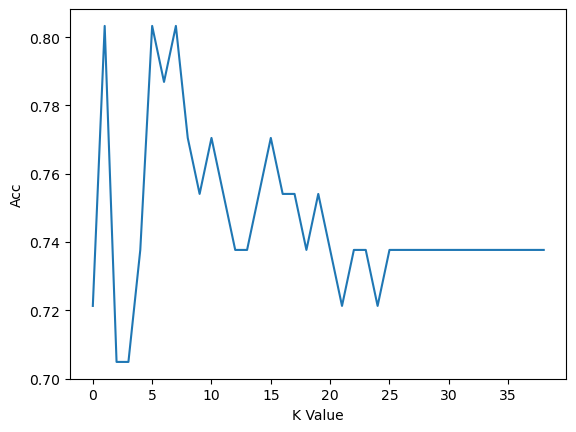

In [276]:
import matplotlib.pyplot as plt
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [277]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [278]:
#No linaiar algorithm of ML
data = pd.read_csv('heart.csv')
data = data.drop_duplicates()
X = data.drop('target',axis=1)
y=data['target']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [279]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [280]:
y_pred4=dt.predict(X_test)

In [281]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)
# Recall
recall = recall_score(y_test, y_pred4)
print("Recall:", recall)
# Precision
precision = precision_score(y_test, y_pred4)
print("Precision:", precision)
#F1_score
f1 = f1_score(y_test, y_pred4)
print("F1 Score:", f1)

Accuracy: 0.7049180327868853
Recall: 0.6551724137931034
Precision: 0.7037037037037037
F1 Score: 0.6785714285714286


In [282]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [283]:
y_pred5= rf.predict(X_test)

In [284]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)
# Recall
recall = recall_score(y_test, y_pred5)
print("Recall:", recall)
# Precision
precision = precision_score(y_test, y_pred5)
print("Precision:", precision)
#F1_score
f1 = f1_score(y_test, y_pred5)
print("F1 Score:", f1)

Accuracy: 0.8360655737704918
Recall: 0.896551724137931
Precision: 0.7878787878787878
F1 Score: 0.8387096774193549


In [285]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [286]:
y_pred6 = gbc.predict(X_test)


In [287]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred6)
print("Accuracy:", accuracy)
# Recall
recall = recall_score(y_test, y_pred6)
print("Recall:", recall)
# Precision
precision = precision_score(y_test, y_pred6)
print("Precision:", precision)
#F1_score
f1 = f1_score(y_test, y_pred6)
print("F1 Score:", f1)

Accuracy: 0.8032786885245902
Recall: 0.8620689655172413
Precision: 0.7575757575757576
F1 Score: 0.8064516129032258


In [288]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [289]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,78.688525
2,KNN,80.327869
3,DT,70.491803
4,RF,83.606557
5,GB,80.327869


<Axes: xlabel='Models', ylabel='ACC'>

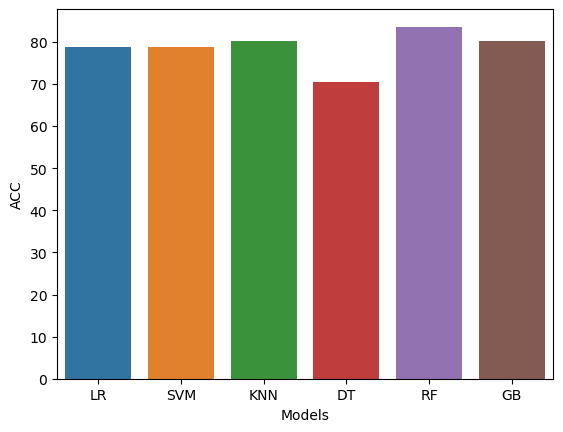

In [290]:
import seaborn as sns
sns.barplot(x=final_data['Models'], y=final_data['ACC'])


the best model with high accuracy is Random Forest Classifier

In [291]:
X=data.drop('target',axis=1)
y=data['target']
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

Prediction on new data 

In [292]:
import pandas as pd
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [293]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [294]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [295]:
import joblib
joblib.dump(rf,'model_heart.pkl')

['model_heart.pkl']

In [1]:
from tkinter import *
import joblib


In [3]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_heart.pkl')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()



C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
